<a href="https://colab.research.google.com/github/katie-emmons/brfss/blob/main/CSCA_5522_Data_Mining_Project_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Behavioral Risk Factors for Chronic Diseases**

*By Katie Duggal*

**Introduction**

Chronic diseases are some of the leading causes of death and disability in the United States. Many chronic diseases, including cancer, heart disease, and diabetes are influenced by lifestyle factors such as smoking, poor nutrition, lack of physical activity, and excessive alcohol consumption. Social determinants of health, such as lack of access to fresh fruits and vegetables and limited access to medical care can increase the prevalence and incidence of chronic disease.

**Project Goals**

This project aims to explore key behavioural risk factors for chronic disease and identify possible areas
for targeted interventions.

**Data**

Data for this project come from the **Behavioral Risk Factor Surveillance System (BRFSS)**,  a collection of telephone surveys that collect information about U.S resident’s health-related risk behaviors, chronic diseases, and use of preventative services. Established in 1984 in 15 states, the BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories (Guam, Puerto Rico, and the Virgin Islands). You can access the data used for this project on the Data.gov website [here.](https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system)

**Import packages**

In [43]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
!pip install chart_studio
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go

**Change working directory**

In [44]:
%cd /content/drive/MyDrive/CSCA_5522/

/content/drive/MyDrive/CSCA_5522


In [45]:
data_file = 'Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System_12132025.csv'

**Load data**

In [46]:
df = pd.read_csv(data_file)

/tmp/ipython-input-3194456257.py:1: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



**Explore dataset**

In [47]:
df.shape

(110880, 33)

In [48]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Sex', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [49]:
print("First date: ", df['YearStart'].min())
print("Last date: ", df['YearStart'].max())

First date:  2011
Last date:  2024


In [50]:
print("Number of survey questions: ", len(df['Question'].unique()))

Number of survey questions:  9


In [51]:
print("Number of locations: ", len(df['LocationDesc'].unique()))

Number of locations:  55


In [52]:
print("Locations: ", df['LocationDesc'].unique())

Locations:  ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'National' 'Guam'
 'Puerto Rico' 'Virgin Islands']


**Survey questions are organized by class and topic**

In [53]:
for question_class in df['Class'].unique():
    print(f"- {question_class}")

- Obesity / Weight Status
- Physical Activity
- Fruits and Vegetables


In [54]:
for topic in df['Topic'].unique():
    print(f"- {topic}")

- Obesity / Weight Status
- Physical Activity - Behavior
- Fruits and Vegetables - Behavior


In [55]:
for question in df['Question'].unique():
    print(f"- {question}")

- Percent of adults aged 18 years and older who have obesity
- Percent of adults aged 18 years and older who have an overweight classification
- Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
- Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination) and engage in muscle-strengthening activities on 2 or more days a week
- Percent of adults who achieve more than 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
- Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
- Percent of adults who engage in no leisure-time physical activity
- Percent of adults

**Responses are stratefied by income, age of respondent, race/ethnicity, education, and sex.**

In [56]:
for category in df['StratificationCategory1'].unique():
    print(f"- {category}")

- Income
- Age (years)
- Race/Ethnicity
- Education
- Sex
- Total


In [57]:
for category in df['StratificationCategory1'].unique():
  df_category = df.loc[df['StratificationCategory1'] == category]
  print(f"- {category}:")
  for stratification_value in df_category['Stratification1'].unique():
    print(f"  - {stratification_value}")

- Income:
  - $15,000 - $24,999
  - $25,000 - $34,999
  - $35,000 - $49,999
  - $50,000 - $74,999
  - $75,000 or greater
  - Data not reported
  - Less than $15,000
- Age (years):
  - 18 - 24
  - 25 - 34
  - 35 - 44
  - 45 - 54
  - 55 - 64
  - 65 or older
- Race/Ethnicity:
  - 2 or more races
  - American Indian/Alaska Native
  - Asian
  - Hawaiian/Pacific Islander
  - Hispanic
  - Non-Hispanic Black
  - Non-Hispanic White
  - Other
- Education:
  - College graduate
  - High school graduate
  - Less than high school
  - Some college or technical school
- Sex:
  - Female
  - Male
- Total:
  - Total


**Let's look at percent of adults aged 18+ who had obesity in Washington in 2001, stratefied by income**

In [58]:
cond1 = df['Question'] == 'Percent of adults aged 18 years and older who have obesity'
cond2 = df['LocationAbbr'] == 'WA'
cond3 = df['YearStart'] == 2011
cond4 = df['StratificationCategory1'] == "Income"

df.loc[cond1 & cond2 & cond3 & cond4]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1316,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,"$15,000 - $24,999",INC,INC1525
1317,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,"$25,000 - $34,999",INC,INC2535
1318,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,"$35,000 - $49,999",INC,INC3550
1319,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,"$50,000 - $74,999",INC,INC5075
1320,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,"$75,000 or greater",INC,INC75PLUS
1331,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,Data not reported,INC,INCNR
1336,2011,2011,WA,Washington,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(47.522278629, -120.47001079)",OWS,OWS1,Q036,VALUE,53,Income,"Less than $15,000",INC,INCLESS15


**Let's look at how much data is missing**

In [59]:
missing_data = len(df.loc[df['Data_Value_Footnote'] == 'Data not available because sample size is insufficient or data not reported.'])
total_records = len(df)
print(f"Percent of missing data: {round(((missing_data/total_records) * 100), 1)} %")

Percent of missing data: 11.9 %


In [60]:
results = []

for year in df['YearStart'].unique():
  missing_data = len(df.loc[(df['Data_Value_Footnote'] == 'Data not available because sample size is insufficient or data not reported.') & (df['YearStart'] == year)])
  total_records = len(df.loc[df['YearStart'] == year])
  pct_missing = round(((missing_data/total_records) * 100), 0)
  results.append({"Year": year,"Pct_Missing": pct_missing})

missing_df = pd.DataFrame(results).sort_values("Year")
missing_df

,Year,Pct_Missing
0,2011,14.0
1,2012,13.0
2,2013,14.0
3,2014,11.0
4,2015,12.0
5,2016,10.0
6,2017,11.0
7,2018,11.0
8,2019,13.0
9,2020,11.0


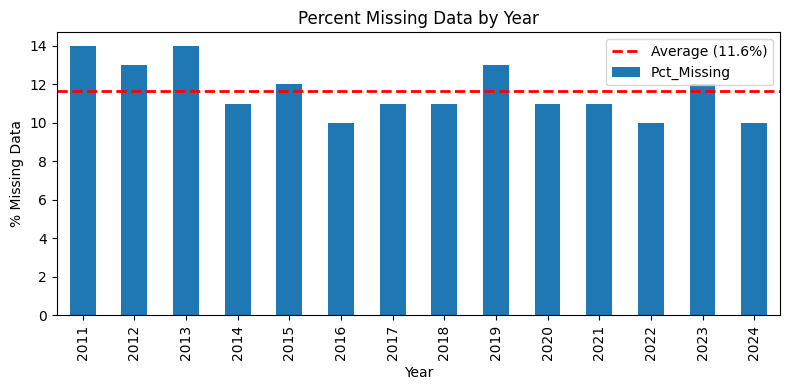

In [61]:
avg = missing_df['Pct_Missing'].mean()

plot = missing_df.plot(
    x="Year",
    y="Pct_Missing",
    kind="bar",
    figsize=(8, 4))

plot.axhline(
    y=avg,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average ({avg:.1f}%)"
)

plot.set_ylabel("% Missing Data")
plot.set_title("Percent Missing Data by Year")
plot.legend()

plt.tight_layout()
plt.show()

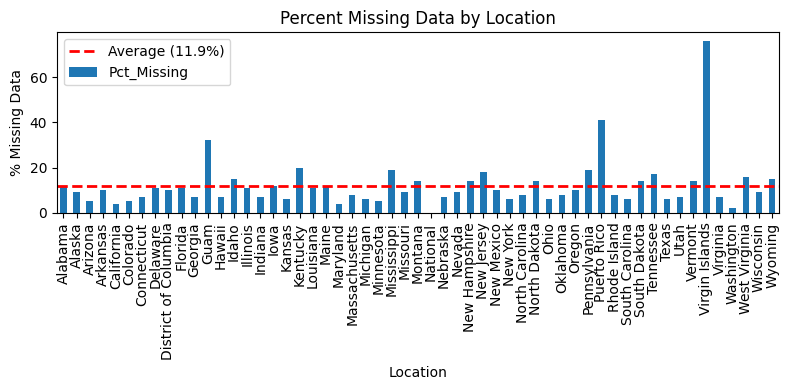

In [62]:
results = []

for location in df['LocationDesc'].unique():
  missing_data = len(df.loc[(df['Data_Value_Footnote'] == 'Data not available because sample size is insufficient or data not reported.') & (df['LocationDesc'] == location)])
  total_records = len(df.loc[df['LocationDesc'] == location])
  pct_missing = round(((missing_data/total_records) * 100), 0)
  results.append({"location": location,"Pct_Missing": pct_missing})

missing_df = pd.DataFrame(results).sort_values("location")

avg = missing_df['Pct_Missing'].mean()

plot = missing_df.plot(
    x="location",
    y="Pct_Missing",
    kind="bar",
    figsize=(8, 4))

plot.axhline(
    y=avg,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average ({avg:.1f}%)"
)

plot.set_xlabel("Location")
plot.set_ylabel("% Missing Data")
plot.set_title("Percent Missing Data by Location")
plot.legend()

plt.tight_layout()
plt.show()

In [63]:
missing_df = pd.DataFrame(results).sort_values("Pct_Missing", ascending=False)
missing_df

,location,Pct_Missing
54,Virgin Islands,76.0
53,Puerto Rico,41.0
52,Guam,32.0
17,Kentucky,20.0
24,Mississippi,19.0
38,Pennsylvania,19.0
30,New Jersey,18.0
42,Tennessee,17.0
48,West Virginia,16.0
12,Idaho,15.0


In [64]:
territories = ['Virgin Islands', 'Puerto Rico', 'Guam']
territories_df = missing_df[missing_df['location'].isin(territories)]
display(territories_df)

,location,Pct_Missing
54,Virgin Islands,76.0
53,Puerto Rico,41.0
52,Guam,32.0


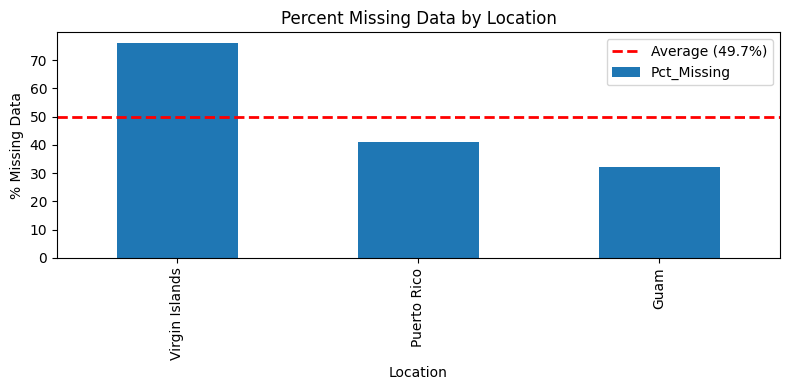

In [65]:
avg_territories = territories_df['Pct_Missing'].mean()

plot = territories_df.plot(
    x="location",
    y="Pct_Missing",
    kind="bar",
    figsize=(8, 4))

plot.axhline(
    y=avg_territories,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average ({avg_territories:.1f}%)"
)

plot.set_xlabel("Location")
plot.set_ylabel("% Missing Data")
plot.set_title("Percent Missing Data by Location")
plot.legend()

plt.tight_layout()
plt.show()

**Let's create a new dataset that excludes the US territories (due to significant amounts of missing data)**

In [66]:
df_50 = df.drop(df[df['LocationDesc'].isin(territories)].index)
df_50.shape

(104832, 33)

**Let's look at some general trends**

In [67]:
# How does the national obesity rate vary from 2011 - 2024?
cond1 = df_50['Question'] == 'Percent of adults aged 18 years and older who have obesity'
cond2 = df_50['LocationDesc'] == 'National'
cond3 = df_50['StratificationCategory1'] == 'Total'

obesity = df_50.loc[cond1 & cond2 & cond3]

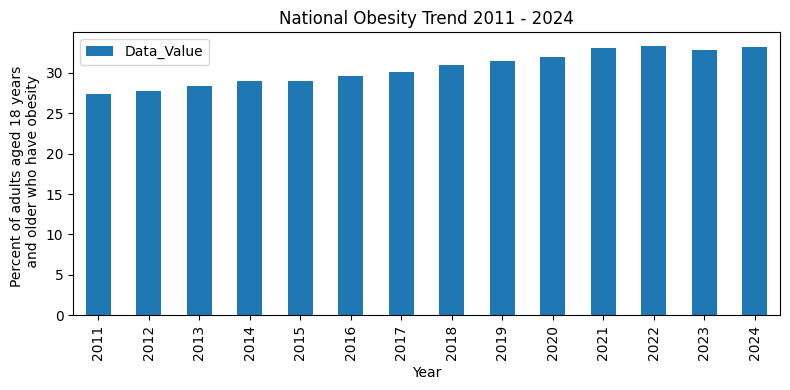

In [68]:
plot = obesity.plot(
    x="YearStart",
    y="Data_Value",
    kind="bar",
    figsize=(8, 4))

plot.set_xlabel("Year")
plot.set_ylabel("Percent of adults aged 18 years \n and older who have obesity")
plot.set_title("National Obesity Trend 2011 - 2024")
plot.legend()

plt.tight_layout()
plt.show()

In [69]:
# how does physical activity vary from 2011 to 2024?
cond1 = df_50['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
cond2 = df_50['LocationDesc'] == 'National'
cond3 = df_50['StratificationCategory1'] == 'Total'

activity = df_50.loc[cond1 & cond2 & cond3]

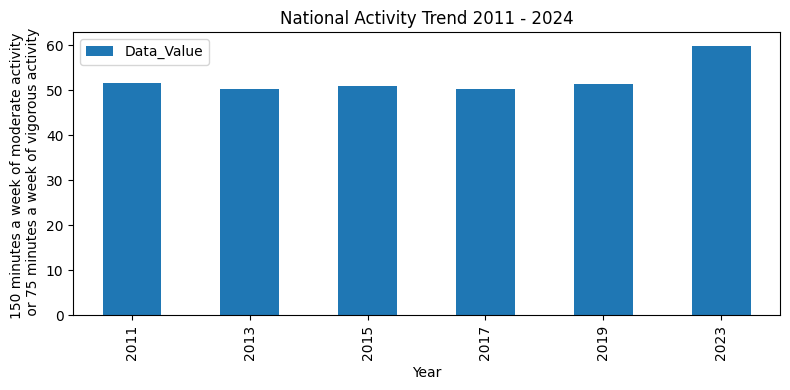

In [70]:
plot = activity.plot(
    x="YearStart",
    y="Data_Value",
    kind="bar",
    figsize=(8, 4))

plot.set_xlabel("Year")
plot.set_ylabel("150 minutes a week of moderate activity \n or 75 minutes a week of vigorous activity")
plot.set_title("National Activity Trend 2011 - 2024")
plot.legend()

plt.tight_layout()
plt.show()

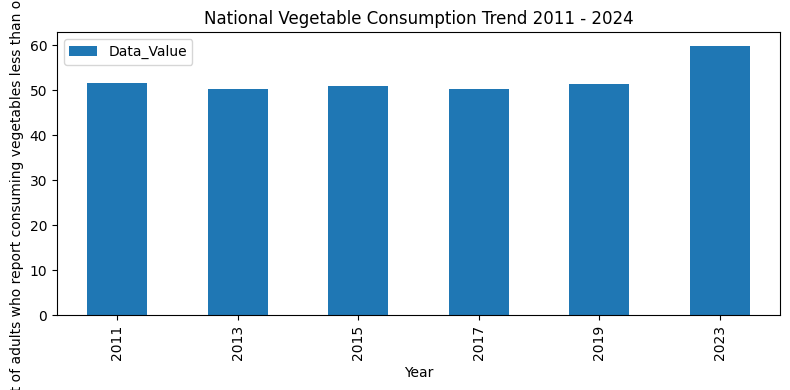

In [71]:
# how does fruit and veggie eating vary from 2011 to 2024?
cond1 = df_50['Question'] == 'Percent of adults who report consuming vegetables less than one time daily'
cond2 = df_50['LocationDesc'] == 'National'
cond3 = df_50['StratificationCategory1'] == 'Total'

veggies = df_50.loc[cond1 & cond2 & cond3]

plot = activity.plot(
    x="YearStart",
    y="Data_Value",
    kind="bar",
    figsize=(8, 4))

plot.set_xlabel("Year")
plot.set_ylabel("Percent of adults who report consuming vegetables less than one time daily")
plot.set_title("National Vegetable Consumption Trend 2011 - 2024")
plot.legend()

plt.tight_layout()
plt.show()

**Question 1: What is the overall trend in physical activity? How does it vary by demographic factor?**

In [72]:
# filter to look at a specific physical activity question
cond1 = df_50['Question'] == "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination) and engage in muscle-strengthening activities on 2 or more days a week"

# filter to look at national average
cond2 = df_50['LocationDesc'] == 'National'

# filtered dataset
df_50_phys = df_50.loc[cond1 & cond2]

In [73]:
# visualize overall trend in physical activity for all 50 states from 2011 - 2023
fig = px.line(df_50_phys[df_50_phys['StratificationCategoryId1'] == 'OVR'], x="YearStart", y="Data_Value", markers = True,
              labels = {"YearStart" : "Year",
                        "Data_Value" : "Percent"},
              title="National Physical Activity 2011 - 2023")
fig.update_layout(
    title={
        "text": "National Physical Activity 2011 - 2023"
                "<br><sup>"
                "Percent of adults who achieve 75 - 150 minutes of physical activity per week and engage in muscle-strengthening activities on 2 or more days per week"
                "</sup>",
        "x": 0.5,
        "xanchor": "center"
    },
    yaxis = dict(
        title = dict(text = "Percent"),
        range = [0, 40],
        dtick = 10,
    ),
)
fig.show()

Now let's make some nice looking interactive plots with Plotly

In [74]:
# filter to look at a specific physical activity question
cond1 = df_50['Question'] == "Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity (or an equivalent combination) and engage in muscle-strengthening activities on 2 or more days a week"
# filter to look at national average
cond2 = df_50['LocationDesc'] == 'National'
# filtered dataset
df = df_50.loc[cond1 & cond2]
# fix formatting issues
df.loc[:, 'Stratification1'] = df['Stratification1'].str.replace('$', '', regex=False)
df.loc[:, 'StratificationCategory1'] = df['StratificationCategory1'].str.replace('Income', 'Income (USD)', regex=False)

In [75]:
fig = go.Figure()

categories = df["StratificationCategory1"].unique().tolist()

trace_counts = []

for i, category in enumerate(categories):

    df_category = df[df["StratificationCategory1"] == category]
    groups = df_category["Stratification1"].unique()

    count = 0

    for group in groups:
        df_sub = df_category[df_category["Stratification1"] == group]

        fig.add_trace(
            go.Scatter(
                x=df_sub["YearStart"],
                y=df_sub["Data_Value"],
                mode="lines+markers",
                name=f"{group}",
                legendgroup = category,
                visible=(i == 0)
            )
        )

        count += 1

    trace_counts.append(count)

buttons = []
total_traces = sum(trace_counts)

start = 0

for i, category in enumerate(categories):

    visible = [False] * total_traces

    for j in range(trace_counts[i]):
        visible[start + j] = True

    buttons.append(
        dict(
            label=category,
            method="update",
            args=[
                {"visible": visible},
            ]
        )
    )

    start += trace_counts[i]

fig.update_layout(

    xaxis = dict(
        title = dict(text = "Year"),
        ),

    yaxis = dict(
        title = dict(text = "Percent"),
        range = [0, 40],
        dtick = 10,
    ),


    title = dict(
        text = "National Trend in Physical Activity 2011 - 2023"
                "<br><sup>"
                "Percent of adults who achieve 75 - 150 minutes of physical activity per week and engage in muscle-strengthening activities on 2 or more days per week"
                "</sup>",
        x = 0.5,
        xref = "paper",
        xanchor = "center"
    ),

    updatemenus = [
        dict(
            buttons = buttons,
            direction = "down",
            showactive = True,
            x = 1.025,
            xanchor = "left",
            y = 1,
            yanchor = "top"
        )
    ],

    legend = dict(
        x = 1.025,
        y = 0.5,
        xanchor = "left",
        yanchor = "middle"),

    margin = dict(r = 200),
)


fig.show()
fig.write_html("physical_activity.html", full_html=True, include_plotlyjs="cdn")

**Question 2: What is the overall trend in obesity levels? How does it vary by demographic factor?**

In [76]:
# filter to look at the two questions pertaining to weight status
cond1 = df_50['Question'] == "Percent of adults aged 18 years and older who have obesity"
cond2 = df_50['Question'] == "Percent of adults aged 18 years and older who have an overweight classification"

# filter to look at national average
cond3 = df_50['LocationDesc'] == 'National'

# filtered dataset
obesity = df_50.loc[(cond1 | cond2) & cond3]

# fix formatting issues
obesity.loc[:, 'Stratification1'] = obesity['Stratification1'].str.replace('$', '', regex=False)
obesity.loc[:, 'StratificationCategory1'] = df['StratificationCategory1'].str.replace('Income', 'Income (USD)', regex=False)

In [77]:
fig = px.line(obesity[obesity['StratificationCategoryId1'] == 'OVR'], x="YearStart", y="Data_Value", color='Question', markers = True,
              labels = {"YearStart" : "Year",
                        "Data_Value" : "Percent",
                        "Question" : "Question"},
              title="National Obesity Trends 2011 - 2024")
fig.update_layout(
    title={
        "text": "National Obesity Trends 2011 - 2024",
        "x": 0.5,
        "xanchor": "center",
        "xref" : "paper"
    },
    legend ={
        "y" : 1.1,
        "orientation" : "h",
        },
    yaxis = dict(
        title = dict(text = "Percent"),
        range = [20, 40],
        dtick = 5,
    ),
)
fig.show()

In [78]:
# filter to look at a specific physical activity question
cond1 = df_50['Question'] == "Percent of adults aged 18 years and older who have obesity"

# filter to look at national average
cond2 = df_50['LocationDesc'] == 'National'

# filtered dataset
df = df_50.loc[cond1 & cond2]

# fix formatting issues
df.loc[:, 'Stratification1'] = df['Stratification1'].str.replace('$', '', regex=False)
df.loc[:, 'StratificationCategory1'] = df['StratificationCategory1'].str.replace('Income', 'Income (USD)', regex=False)

In [79]:
fig = go.Figure()

categories = df["StratificationCategory1"].unique().tolist()

trace_counts = []

for i, category in enumerate(categories):

    df_category = df[df["StratificationCategory1"] == category]
    groups = df_category["Stratification1"].unique()

    count = 0

    for group in groups:
        df_sub = df_category[df_category["Stratification1"] == group]

        fig.add_trace(
            go.Scatter(
                x=df_sub["YearStart"],
                y=df_sub["Data_Value"],
                mode="lines+markers",
                name=f"{group}",
                legendgroup = category,
                visible=(i == 0)
            )
        )

        count += 1

    trace_counts.append(count)

buttons = []
total_traces = sum(trace_counts)

start = 0

for i, category in enumerate(categories):

    visible = [False] * total_traces

    for j in range(trace_counts[i]):
        visible[start + j] = True

    buttons.append(
        dict(
            label=category,
            method="update",
            args=[
                {"visible": visible},
            ]
        )
    )

    start += trace_counts[i]

fig.update_layout(

    xaxis = dict(
        title = dict(text = "Year"),
        ),

    yaxis = dict(
        title = dict(text = "Percent"),
        range = [0, 50],
        dtick = 10,
    ),


    title = dict(
        text = "National Trend in Obesity 2011 - 2024"
               "<br><sup>"
               "Percent of adults aged 18 years and older who have obesity"
               "</sup>",
        x = 0.5,
        xref = "paper",
        xanchor = "center"
    ),

    updatemenus = [
        dict(
            buttons = buttons,
            direction = "down",
            showactive = True,
            x = 1.025,
            xanchor = "left",
            y = 1,
            yanchor = "top"
        )
    ],

    legend = dict(
        x = 1.025,
        y = 0.5,
        xanchor = "left",
        yanchor = "middle"),

    margin = dict(r = 200),
)


fig.show()
fig.write_html("obesity.html", full_html=True, include_plotlyjs="cdn")

**Question 3: What is the overall trend in healthy eating? How does it vary by demographic factor?**

In [80]:
# filter to look at the two questions pertaining to healthy eating
cond1 = df_50['Question'] == "Percent of adults who report consuming fruit less than one time daily"
cond2 = df_50['Question'] == "Percent of adults who report consuming vegetables less than one time daily"

# filter to look at national average
cond3 = df_50['LocationDesc'] == 'National'

# filtered dataset
healthy_eating = df_50.loc[(cond1 | cond2) & cond3]

# fix formatting issues
healthy_eating.loc[:, 'Stratification1'] = obesity['Stratification1'].str.replace('$', '', regex=False)
healthy_eating.loc[:, 'StratificationCategory1'] = df['StratificationCategory1'].str.replace('Income', 'Income (USD)', regex=False)

In [81]:
fig = px.line(healthy_eating[healthy_eating['StratificationCategoryId1'] == 'OVR'], x="YearStart", y="Data_Value", color='Question', markers = True,
              labels = {"YearStart" : "Year",
                        "Data_Value" : "Percent",
                        "Question" : "Question"},
              title="National Nutrition Trends 2011 - 2024")
fig.update_layout(
    title={
        "text": "National Nutrition Trends 2011 - 2024",
        "x": 0.5,
        "xanchor": "center",
        "xref" : "paper"
    },
    legend ={
        "y" : 1.1,
        "orientation" : "h",
        },
    yaxis = dict(
        title = dict(text = "Percent"),
        range = [0, 50],
        dtick = 10,
    ),
    xaxis = dict(
        title = dict(text = "Year"),
        range = [2017, 2021],
        dtick = 1,
    )
)
fig.show()

In [82]:
# filter to look at a specific nutrition activity question
cond1 = df_50['Question'] == "Percent of adults who report consuming vegetables less than one time daily"

# filter to look at national average
cond2 = df_50['LocationDesc'] == 'National'

# filtered dataset
df = df_50.loc[cond1 & cond2]

# fix formatting issues
df.loc[:, 'Stratification1'] = df['Stratification1'].str.replace('$', '', regex=False)
df.loc[:, 'StratificationCategory1'] = df['StratificationCategory1'].str.replace('Income', 'Income (USD)', regex=False)

In [83]:
fig = go.Figure()

categories = df["StratificationCategory1"].unique().tolist()

trace_counts = []

for i, category in enumerate(categories):

    df_category = df[df["StratificationCategory1"] == category]
    groups = df_category["Stratification1"].unique()

    count = 0

    for group in groups:
        df_sub = df_category[df_category["Stratification1"] == group]

        fig.add_trace(
            go.Scatter(
                x=df_sub["YearStart"],
                y=df_sub["Data_Value"],
                mode="lines+markers",
                name=f"{group}",
                legendgroup = category,
                visible=(i == 0)
            )
        )

        count += 1

    trace_counts.append(count)

buttons = []
total_traces = sum(trace_counts)

start = 0

for i, category in enumerate(categories):

    visible = [False] * total_traces

    for j in range(trace_counts[i]):
        visible[start + j] = True

    buttons.append(
        dict(
            label=category,
            method="update",
            args=[
                {"visible": visible},
            ]
        )
    )

    start += trace_counts[i]

fig.update_layout(

    xaxis = dict(
        title = dict(text = "Year"),
        ),

    yaxis = dict(
        title = dict(text = "Percent"),
        range = [0, 50],
        dtick = 10,
    ),


    title = dict(
        text = "National Nutrition Trends 2017 - 2021"
               "<br><sup>"
               "Percent of adults who report consuming vegetables less than one time daily"
               "</sup>",
        x = 0.5,
        xref = "paper",
        xanchor = "center"
    ),

    updatemenus = [
        dict(
            buttons = buttons,
            direction = "down",
            showactive = True,
            x = 1.025,
            xanchor = "left",
            y = 1,
            yanchor = "top"
        )
    ],

    legend = dict(
        x = 1.025,
        y = 0.5,
        xanchor = "left",
        yanchor = "middle"),

    margin = dict(r = 200),
)


fig.show()
fig.write_html("nutrition.html", full_html=True, include_plotlyjs="cdn")